# 📊 Day 5: Visualizations of Shipping Delays, Discounts, and Invoices


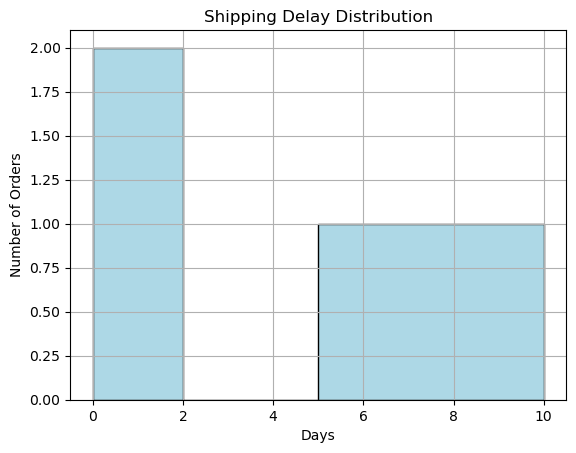

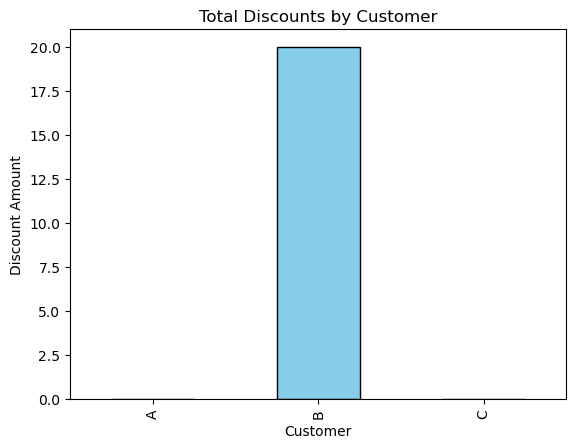

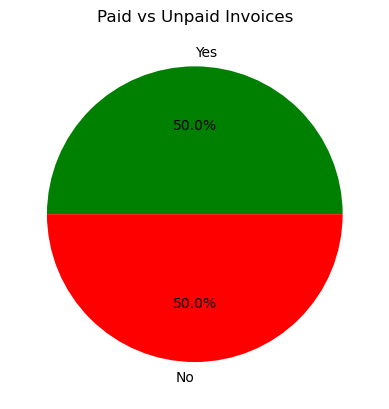

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample Orders Data ---
orders = pd.DataFrame({
    "OrderID": [1,2,3,4],
    "Customer": ["A","B","C","A"],
    "OrderDate": pd.to_datetime(["2025-01-01","2025-01-03","2025-01-05","2025-01-07"]),
    "ShipDate": pd.to_datetime(["2025-01-02","2025-01-08","2025-01-06", None]),
    "Amount": [100,200,150,300]
})

# --- Sample Invoices Data ---
invoices = pd.DataFrame({
    "OrderID": [1,2,3,4],
    "InvoiceDate": pd.to_datetime(["2025-01-02","2025-01-08","2025-01-06","2025-01-10"]),
    "Paid": ["Yes","No","Yes","No"]
})

# --- Merge Orders + Invoices ---
merged_df = pd.merge(orders, invoices, on="OrderID", how="left")

# --- Calculate Shipping Delay ---
merged_df["ShipDelay"] = (merged_df["ShipDate"] - merged_df["OrderDate"]).dt.days

# --- Flag Late Shipments (>5 days) ---
merged_df["LateShipment"] = merged_df["ShipDelay"] > 2

# --- Apply 10% Discount for Late Shipments ---
merged_df["LateDiscount"] = merged_df.apply(
    lambda row: row["Amount"]*0.1 if row["LateShipment"] else 0, axis=1
)

merged_df

#---------------Plotting the Charts ---------------------------

#----- Histogram of shipping delays ----------
merged_df["ShipDelay"].dropna().hist(bins=[0,2,5,10], color="lightblue", edgecolor="black")
plt.title("Shipping Delay Distribution")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.show()

#------- Discounts by Customer --------------
discount_summary = merged_df.groupby("Customer")["LateDiscount"].sum()

discount_summary.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Discounts by Customer")
plt.ylabel("Discount Amount")
plt.show()

#-------- Paid vs Unpaid Invoices ------------
paid_counts = merged_df["Paid"].value_counts()

paid_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green","red"])
plt.title("Paid vs Unpaid Invoices")
plt.ylabel("")
plt.show()




### 📊 Shipping Delay Distribution
Shows how quickly orders are shipped. Late shipments flagged at >5 days.

### 💸 Discounts by Customer
Highlights which customers received the most discounts due to late shipments.

### 📭 Paid vs Unpaid Invoices
Pie chart showing proportion of paid vs unpaid invoices — a snapshot of financial health.
